In [2]:
from ThesisFunctions import *


In [11]:
# Using GROEBNER BASIS to find number of minimas (
# Simple case: 4 datapoint with small noise



# Define the symbolic variables
x0, b = sp.symbols('x0 b')

# Datapoints must be rational for Groebner function to work
x_i = [1, 2, sp.Rational(401, 100), 7]  # Data
t_i = [0, 1, 2, 3]  # Time

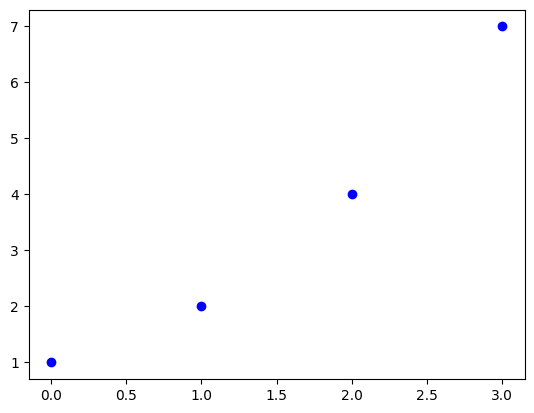

In [12]:
plt.scatter(t_i, x_i, color='blue', label='Data Points')

In [41]:

# Construct the SSE polynomial
SSE_poly = sum([(x - x0 * b**t)**2 for x, t in zip(x_i, t_i)])

#print(SSE_poly)

# Compute the partial derivatives with respect to x0 and beta
partial_x0 = sp.diff(SSE_poly, x0)
partial_b = sp.diff(SSE_poly, b)

#print(" ")
#print("Partials:")
#print(partial_x0)
#print(partial_b)
#print(" ")

# Compute the Groebner basis for the system of equations given by the partial derivatives
B = sp.groebner([partial_x0, partial_b], x0, b, order='lex')
# The result 'B' is a Groebner basis for the ideal generated by partial_x0 and partial_beta
print("Groebner Basis:")
print(" ")
for poly in B:
    print(poly, "\n")

Groebner Basis:
 
7221619851953937787698918587683758839907306373050719059446435433003092151219805516987753924039587586423943*b**17/31153347512884941865357400498188872620491812124467229378814302781865054681716432969770508636543632290856300 - 51438103827468719741147482348123355351960473713451795519311982161209433436697776984592195203788364045635199390387*b**16/8722937303607783722300072139492884333737707394850824226068004778922215310880601231535742418232217041439764000 - 15702412799949189534100838755035187714168319893188409807861112923623124444284954914971012974657071862480754762213139861*b**15/52337623821646702333800432836957306002426244369104945356408028673533291865283607389214454509393302248638584000 + 898462386063903324380166585381727185516347030277566966004661723456993502572222135171068020499094801707171063206669*b**14/52337623821646702333800432836957306002426244369104945356408028673533291865283607389214454509393302248638584000 - 201656635863463123459314874212778578537261180527500285

In [42]:
def sturm_sequence(p):
    p0 = p
    p1 = diff(p, b)
    sturm_seq = [p0, p1]

    # Generate the rest of the Sturm sequence using sympy's polynomial division
    while not sturm_seq[-1].is_zero:
        p_i, remainder = sturm_seq[-2].as_expr(), sturm_seq[-1].as_expr()
        div_result = Poly(p_i, b).div(Poly(remainder, b))
        sturm_seq.append(-div_result[1])

    # Remove the last polynomial if it's zero.
    if sturm_seq[-1].is_zero:
        sturm_seq.pop()

    return [p.as_expr() for p in sturm_seq]

def count_sign_changes(sequence, value):
    signs = [p.subs(b, value) for p in sequence]
    sign_changes = 0
    previous_sign = None
    for sign in signs:
        current_sign = sign > 0
        if previous_sign is not None and current_sign != previous_sign:
            sign_changes += 1
        previous_sign = current_sign

    return sign_changes

def count_positive_roots(p):
    sturm_seq = sturm_sequence(Poly(p, b))

    # Count sign changes at positive infinity and zero.
    sign_changes_at_inf = count_sign_changes(sturm_seq, 1e10)  # Simulate positive infinity.
    sign_changes_at_zero = count_sign_changes(sturm_seq, 0) #INCLUDING 0

    return sign_changes_at_zero - sign_changes_at_inf 

# Example usage:
#x = symbols('x')
#p = x**2 - 6*x # Define your polynomial here.




num_positive_roots = count_positive_roots(B[1])

print(f'Number of positive roots: {num_positive_roots}')


Number of positive roots: 1


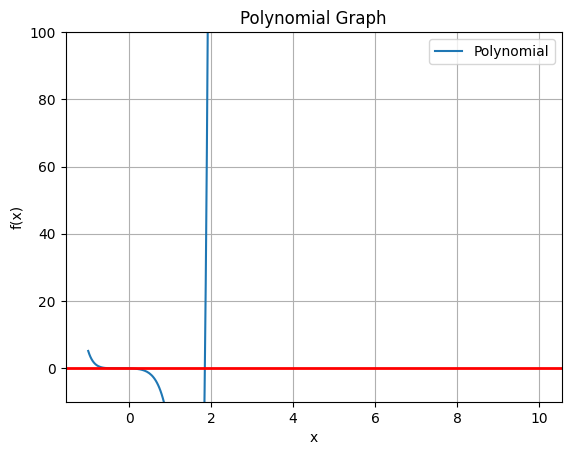

In [43]:
#Checking the number of positive roots (Graphically )

# Define your polynomial function
def poly_func(b):
    return b**10 - 49199*b**9/280700 + 1699*b**8/2807 - 7396*b**7/2807 - 5919*b**6/2807 - 1760601*b**5/280700 - 14937*b**4/2807 - 61543*b**3/20050 - 4306*b**2/2807 - 1102*b/2807 - 200/2807 


# Generate x values
x_values = np.linspace(-1, 10, 400)  # Adjust range and density as needed
y_values = poly_func(x_values)

# Plotting
plt.plot(x_values, y_values, label='Polynomial')
plt.axhline(0, color='red', lw=2)  # X-axis
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Polynomial Graph')
plt.ylim(-10, 100)
plt.show()

In [44]:
#Checking Number of Positive roots NUMBERICALLY using sympy

x = symbols('x')
# Define your polynomial
polynomial = poly_func(x)

# Solve polynomial
roots = solve(polynomial, x)

# Filter positive roots
positive_roots_symbolic = [root.evalf() for root in roots if root.is_real and root > 0]

print(f"Symbolically found positive roots: {positive_roots_symbolic}")


Symbolically found positive roots: [1.84598025888549]


In [45]:
# How many points can Groebner function handle within reasonable 3min on my laptop.

# Using GROEBNER BASIS to find number of minimas (4 datapoint exponential case)

# Define the symbolic variables
x0, b = sp.symbols('x0 b')

# Example data points (replace with your actual data)
# Must be rational for Groebner function to work...
x_i = [1, 2, sp.Rational(401, 100), 7, 18, 33, 69, 130, 260, 555, 1030]  # Data
t_i = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Time

#plt.scatter(t_i, x_i, color='blue', label='Data Points')


# Construct the SSE polynomial
SSE_poly = sum([(x - x0 * b**t)**2 for x, t in zip(x_i, t_i)])

#print(SSE_poly)

# Compute the partial derivatives with respect to x0 and beta
partial_x0 = sp.diff(SSE_poly, x0)
partial_b = sp.diff(SSE_poly, b)

#print(" ")
#print("Partials:")
#print(partial_x0)
#print(partial_b)
#print(" ")

# Compute the Groebner basis for the system of equations given by the partial derivatives
B = sp.groebner([partial_x0, partial_b], x0, b, order='lex')
# The result 'B' is a Groebner basis for the ideal generated by partial_x0 and partial_beta
print("Groebner Basis:")
print(" ")
for poly in B:
    print(poly, "\n")

Groebner Basis:
 
-61236361560139996527296610819902124977564221627507049771029694475014476300920147873673528229835000*b**37/152575270429358172674253896003394089073092473682478514091438081893516008416175598838202468135423766411 - 7828710259172606855894891204598277288321656075293433885390940251135130096557189908465417480227500*b**36/152575270429358172674253896003394089073092473682478514091438081893516008416175598838202468135423766411 - 702384079455216689317571176819491997634281371205519721466236847822291617992129421080901656335000*b**35/6633707409972094464097995478408438655351846681846891917019047038848522105051112992965324701540163757 + 139541535437031835695604471964537648329930234651682755226413898008368053766195494749229925543978000*b**34/152575270429358172674253896003394089073092473682478514091438081893516008416175598838202468135423766411 + 334708980234566124394404307844356654027485766890062161093775197545104703122643368729185753567430772500*b**33/663370740997209446409799547840843865

In [48]:
def generate_almost_exponential_data(n, initial_value=1, growth_rate=2, noise=0.1):
    """
    Generate n data points that follow an almost exponential trend.

    Parameters:
    - n: Number of data points to generate.
    - initial_value: Starting value of the exponential function.
    - growth_rate: Base growth rate of the exponential function.
    - variability: Maximum percentage of variability to apply to each data point.

    Returns:
    - x_i: List of n data points.
    - t_i: List of n time points.
    """
    t_i = list(range(n))  # Generate time points from 0 to n-1
    x_i = []

    for t in t_i:
        # Calculate the exact exponential value
        exact_value = initial_value * growth_rate ** t

        # Apply variability: Randomly adjust the growth rate within the variability range
        adjusted_growth_rate = growth_rate * (1 + random.uniform(-noise, noise))
        adjusted_value = initial_value * adjusted_growth_rate ** t

        # Ensure the output is rational for compatibility with Groebner function
        rational_value = sp.Rational(int(adjusted_value * 100), 100)

        x_i.append(rational_value)
    
    #plt.scatter(t_i, x_i)
    #print(t_i, x_i)
    return x_i, t_i



In [49]:
#Generating VERY noisy data

num_datapoints = 6
initial_value = 1
growth_rate = 2
noise = 10

x_i, t_i = generate_almost_exponential_data(num_datapoints, initial_value, growth_rate, noise)


# Construct the SSE polynomial
SSE_poly = sum([(x - x0 * b**t)**2 for x, t in zip(x_i, t_i)])

#print(SSE_poly)

# Compute the partial derivatives with respect to x0 and beta
partial_x0 = sp.diff(SSE_poly, x0)
partial_b = sp.diff(SSE_poly, b)

#print(" ")
#print("Partials:")
#print(partial_x0)
#print(partial_b)
#print(" ")

# Compute the Groebner basis for the system of equations given by the partial derivatives
B = sp.groebner([partial_x0, partial_b], x0, b, order='lex')

 
num_positive_roots = count_positive_roots(B[1])

print(f'Number of positive roots: {num_positive_roots}')

Number of positive roots: 3


In [39]:
print(B[1])

b**18 + 8101141795029426310795*b**17/318455440911149066 - 150737610821001916*b**16/159227720455574533 + 8101102402193768338296*b**15/159227720455574533 - 949661303337555905*b**14/318455440911149066 + 24303268177575239282225*b**13/318455440911149066 - 228272901388443223*b**12/45493634415878438 + 16202165775390185728199*b**11/159227720455574533 - 2246159316283455183*b**10/318455440911149066 + 20252697461992784362888*b**9/159227720455574533 - 2894408322848545905*b**8/318455440911149066 - 78421828625490675*b**7/159227720455574533 - 39647479390996901*b**6/318455440911149066 + 363847060865499*b**5/318455440911149066 - 6420903764827*b**4/45493634415878438 + 4370411176*b**3/159227720455574533 - 30534761*b**2/159227720455574533 + 1859863*b/45493634415878438 - 33550/159227720455574533


In [55]:
# Testing number of positive roots for various NOISE LEVELS
# All else constant

num_datapoints = 6
initial_value = 1
growth_rate = 2

noise = [1, 2, 5, 6, 7, 8, 10,12, 15, 20, 30, 40, 50, 60, 100, 200, 500]


for level in noise:
    tmp = []
    for i in range(10):
        x_i, t_i = generate_almost_exponential_data(num_datapoints, initial_value, growth_rate, level)
        # Construct the SSE polynomial
        SSE_poly = sum([(x - x0 * b**t)**2 for x, t in zip(x_i, t_i)])
    
        # Compute the partial derivatives with respect to x0 and beta
        partial_x0 = sp.diff(SSE_poly, x0)
        partial_b = sp.diff(SSE_poly, b)
    
        # Compute the Groebner basis for the system of equations given by the partial derivatives
        B = sp.groebner([partial_x0, partial_b], x0, b, order='lex')

        num_positive_roots = count_positive_roots(B[1])

        tmp.append(num_positive_roots)
    
    
    print(f'Number of positive roots for noise={level}: {np.mean(tmp)}')





Number of positive roots for noise=1: 1.0
Number of positive roots for noise=2: 1.7
Number of positive roots for noise=5: 1.6
Number of positive roots for noise=6: 1.6
Number of positive roots for noise=7: 1.7
Number of positive roots for noise=8: 1.8
Number of positive roots for noise=10: 1.9
Number of positive roots for noise=12: 2.1
Number of positive roots for noise=15: 1.8
Number of positive roots for noise=20: 2.0
Number of positive roots for noise=30: 1.9
Number of positive roots for noise=40: 2.2
Number of positive roots for noise=50: 2.2
Number of positive roots for noise=60: 2.2
Number of positive roots for noise=100: 1.9
Number of positive roots for noise=200: 2.3
Number of positive roots for noise=500: 2.4


In [65]:
# Testing number of positive roots for different NUMBER OF DATAPOINTS
# All else constant

initial_value = 1
growth_rate = 2
noise = 2

x, t = generate_almost_exponential_data(50, initial_value, growth_rate, noise)


for n in range(4, 100, 2):
    #tmp = []
    #for i in range(10):
    
    x_i, t_i = x[:n], t[:n]
        # Construct the SSE polynomial
    SSE_poly = sum([(x - x0 * b**t)**2 for x, t in zip(x_i, t_i)])
    
        # Compute the partial derivatives with respect to x0 and beta
    partial_x0 = sp.diff(SSE_poly, x0)
    partial_b = sp.diff(SSE_poly, b)
    
        # Compute the Groebner basis for the system of equations given by the partial derivatives
    B = sp.groebner([partial_x0, partial_b], x0, b, order='lex')

    num_positive_roots = count_positive_roots(B[1])

     #   tmp.append(num_positive_roots)
    
    print(f'Number of positive roots for number of points={n}: {num_positive_roots}')





Number of positive roots for number of points=4: 1
Number of positive roots for number of points=6: 1
Number of positive roots for number of points=8: 0
Number of positive roots for number of points=10: 2
Number of positive roots for number of points=12: 1


KeyboardInterrupt: 

In [74]:
# Removing datapoints, seeing how that affects number of minimas.

def remove_random_pairs(arr1, arr2):
    n = len(arr1)
    if n == 0:
        return 
    
    # Generate a random index. Since Python is 0-indexed, we adjust by -1.
    n = random.randint(1, n) - 1
    
    # Remove the nth element from both arrays
    del arr1[n]
    del arr2[n]
    
    return arr1, arr2




# Defining parameters
num_datapoints = 10
initial_value = 1
growth_rate = 2
nosie = 2

#Generate Data
x_i, t_i = generate_almost_exponential_data(num_datapoints, initial_value, growth_rate, noise)
    
for n in range(6):
    SSE_poly = sum([(x - x0 * b**t)**2 for x, t in zip(x_i, t_i)])
    # Compute the partial derivatives with respect to x0 and beta
    partial_x0 = sp.diff(SSE_poly, x0)
    partial_b = sp.diff(SSE_poly, b)
    # Compute the Groebner basis for the system of equations given by the partial derivatives
    B = sp.groebner([partial_x0, partial_b], x0, b, order='lex')

    num_positive_roots = count_positive_roots(B[1])
    print(x_i)
    print(t_i)
    print(num_positive_roots)
    x_i, t_i = remove_random_pairs(x_i, t_i)






[1, 33/100, 517/100, 81/10, 22321/50, 53/100, 0, 7131/50, 0, 21440971/100]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0
[1, 33/100, 517/100, 81/10, 22321/50, 53/100, 0, 7131/50, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
1
[1, 33/100, 517/100, 81/10, 22321/50, 53/100, 7131/50, 0]
[0, 1, 2, 3, 4, 5, 7, 8]
1
[1, 33/100, 517/100, 81/10, 22321/50, 53/100, 7131/50]
[0, 1, 2, 3, 4, 5, 7]
1
[1, 517/100, 81/10, 22321/50, 53/100, 7131/50]
[0, 2, 3, 4, 5, 7]
1
[1, 517/100, 81/10, 22321/50, 7131/50]
[0, 2, 3, 4, 7]
1


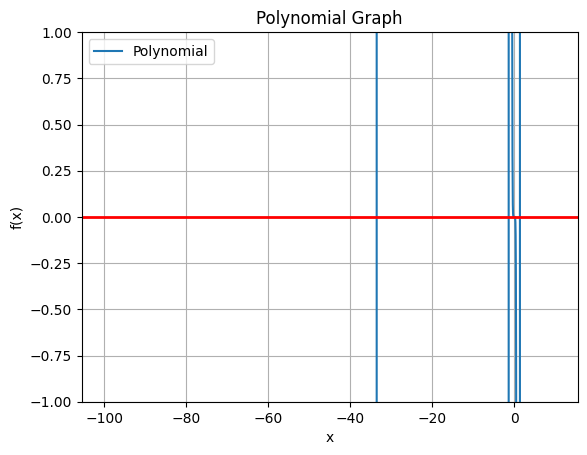

In [33]:
#Checking the number of positive roots (Graphically )

# Define your polynomial function
def poly_func(b):
    return b**18 + 7774373658036*b**17/233921806117 - 4553233305389*b**16/467843612234 + 133774330632*b**15/233921806117 - 2776369633727*b**14/467843612234 - 30909466044705*b**13/935687224468 - 492111743306*b**12/233921806117 - 31179962865099*b**11/467843612234 + 404074815072*b**10/233921806117 - 93810391157911*b**9/935687224468 + 1300261466400*b**8/233921806117 - 31273241267480*b**7/233921806117 + 4769587985015*b**6/233921806117 - 888065821209*b**5/935687224468 + 11067417689*b**4/467843612234 - 1475228009*b**3/467843612234 + 75690347*b**2/467843612234 - 287111*b/233921806117 + 8450/233921806117


# Generate x values
x_values = np.linspace(-100, 10, 4000)  # Adjust range and density as needed
y_values = poly_func(x_values)

# Plotting
plt.plot(x_values, y_values, label='Polynomial')
plt.axhline(0, color='red', lw=2)  # X-axis
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Polynomial Graph')
plt.ylim(-1, 1)
plt.show()